## Load the data


Load the data into a pandas DataFrame.


In [1]:
import pandas as pd

#Load the data
df = pd.read_csv("/content/CVD_Vital_SIgns.csv")
df.head()

,subject_id,icustay_id,heart_rate,blood_pressure,oxygen_saturation,respiratory_rate,temperature,Label
0,94297,200697.0,93.0,94.0,98.0,39.0,36.0,1
1,94229,219381.0,97.0,96.0,98.0,16.0,36.5,0
2,94195,276193.0,82.0,96.0,97.0,25.0,36.3,1
3,94256,241577.0,98.0,196.0,96.0,16.0,36.5,1
4,93996,236789.0,98.0,92.0,99.0,28.0,37.2,1


## Preprocess the data



In [2]:
#Print out the total number of null values
print(df.isnull().sum())

#Print the basic information about each columns
print(df.info())

subject_id           0
icustay_id           0
heart_rate           0
blood_pressure       0
oxygen_saturation    0
respiratory_rate     0
temperature          0
Label                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23468 entries, 0 to 23467
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subject_id         23468 non-null  int64  
 1   icustay_id         23468 non-null  float64
 2   heart_rate         23468 non-null  float64
 3   blood_pressure     23468 non-null  float64
 4   oxygen_saturation  23468 non-null  float64
 5   respiratory_rate   23468 non-null  float64
 6   temperature        23468 non-null  float64
 7   Label              23468 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.4 MB
None


In [3]:
#Fill null values with a media value

for col in ['heart_rate', 'blood_pressure', 'oxygen_saturation', 'respiratory_rate', 'temperature']:
    df[col].fillna(df[col].median(), inplace=True)

print(df.isnull().sum())

subject_id           0
icustay_id           0
heart_rate           0
blood_pressure       0
oxygen_saturation    0
respiratory_rate     0
temperature          0
Label                0
dtype: int64


/tmp/ipython-input-1200276105.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


## Separate features and target variable, and the split the data into training and testing sets

In [4]:
from sklearn.model_selection import train_test_split

# Define the training features
X = df.drop(['subject_id', 'icustay_id', 'Label'], axis=1)

#Define target features
y = df['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (18774, 5)
Shape of X_test: (4694, 5)
Shape of y_train: (18774,)
Shape of y_test: (4694,)


## Train multiple models



In [5]:
#Import the necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Instantiate models
logistic_regression_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "XGBoost": xgboost_model
}

# Train models
logistic_regression_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)


print("Models trained successfully.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:00:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Models trained successfully.


## Perform cross-validation


In [7]:
#Import the cross validation library
from sklearn.model_selection import cross_val_score

cv_results = {}

# Instantiate models
logistic_regression_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "XGBoost": xgboost_model
}


for name, model in models.items():
    # Use X and y for cross-validation as it should be performed on the entire dataset
    scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    cv_results[name] = {
        "Mean ROC-AUC (CV)": scores.mean(),
        "Std Dev ROC-AUC (CV)": scores.std()
    }

for name, metrics in cv_results.items():
    print(f"--- {name} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

best_cv_model_name = max(cv_results, key=lambda k: cv_results[k]["Mean ROC-AUC (CV)"])
print(f"The best performing model based on mean cross-validation ROC-AUC is: {best_cv_model_name}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:01:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:01:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:01:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:01:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:01:37] WARNING: /w

--- Logistic Regression ---
Mean ROC-AUC (CV): 0.9365
Std Dev ROC-AUC (CV): 0.0103


--- Decision Tree ---
Mean ROC-AUC (CV): 0.9999
Std Dev ROC-AUC (CV): 0.0003


--- Random Forest ---
Mean ROC-AUC (CV): 1.0000
Std Dev ROC-AUC (CV): 0.0000


--- XGBoost ---
Mean ROC-AUC (CV): 0.9999
Std Dev ROC-AUC (CV): 0.0002


The best performing model based on mean cross-validation ROC-AUC is: Random Forest


## Plot Cross-Validation Results

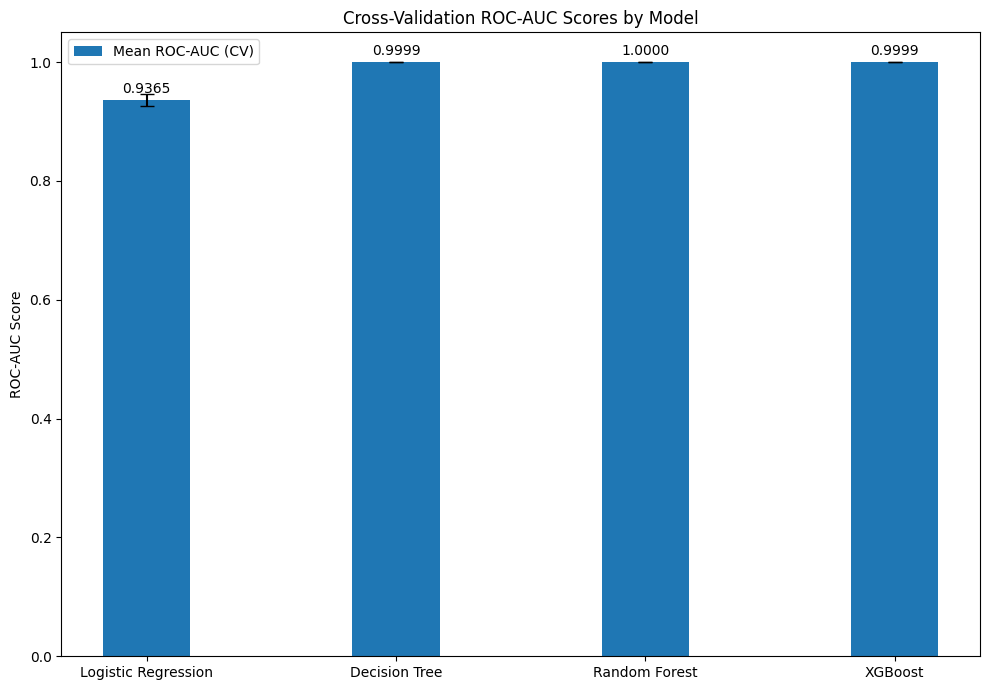

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names, mean ROC-AUC, and standard deviation from cv_results
model_names = list(cv_results.keys())
mean_roc_auc = [cv_results[name]["Mean ROC-AUC (CV)"] for name in model_names]
std_dev_roc_auc = [cv_results[name]["Std Dev ROC-AUC (CV)"] for name in model_names]

x = np.arange(len(model_names)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots(figsize=(10, 7))
rects = ax.bar(x, mean_roc_auc, width, yerr=std_dev_roc_auc, label='Mean ROC-AUC (CV)', capsize=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ROC-AUC Score')
ax.set_title('Cross-Validation ROC-AUC Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Add the values on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.4f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

fig.tight_layout()
plt.show()

## Evaluate models


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import xgboost as xgb

results = {}

# Instantiate models
logistic_regression_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "XGBoost": xgboost_model
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)

for name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred) # Recall is also known as Sensitivity
    f1 = f1_score(y_test, y_pred)

    # Calculate Sensitivity and Specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn) # Same as Recall
    specificity = tn / (tn + fp)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        # For models like SVM that don't have predict_proba, use predicted labels
        roc_auc = roc_auc_score(y_test, y_pred)


    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall (Sensitivity)": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc,
        "Specificity": specificity
    }

for name, metrics in results.items():
    print(f"--- {name} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

best_model_name = max(results, key=lambda k: results[k]["ROC-AUC"])
print(f"The best performing model based on ROC-AUC is: {best_model_name}")

# Update results with CV scores
for name, metrics in cv_results.items():
    if name in results: # Check if the model exists in results before updating
        results[name]["Mean ROC-AUC (CV)"] = metrics["Mean ROC-AUC (CV)"]
        results[name]["Std Dev ROC-AUC (CV)"] = metrics["Std Dev ROC-AUC (CV)"]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:01:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Logistic Regression ---
Accuracy: 0.9156
Precision: 0.9678
Recall (Sensitivity): 0.9176
F1-score: 0.9420
ROC-AUC: 0.9375
Specificity: 0.9099


--- Decision Tree ---
Accuracy: 1.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000
F1-score: 1.0000
ROC-AUC: 1.0000
Specificity: 1.0000


--- Random Forest ---
Accuracy: 1.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000
F1-score: 1.0000
ROC-AUC: 1.0000
Specificity: 1.0000


--- XGBoost ---
Accuracy: 0.9998
Precision: 1.0000
Recall (Sensitivity): 0.9997
F1-score: 0.9999
ROC-AUC: 1.0000
Specificity: 1.0000


The best performing model based on ROC-AUC is: Decision Tree


## Plot ROC Curves for All Models



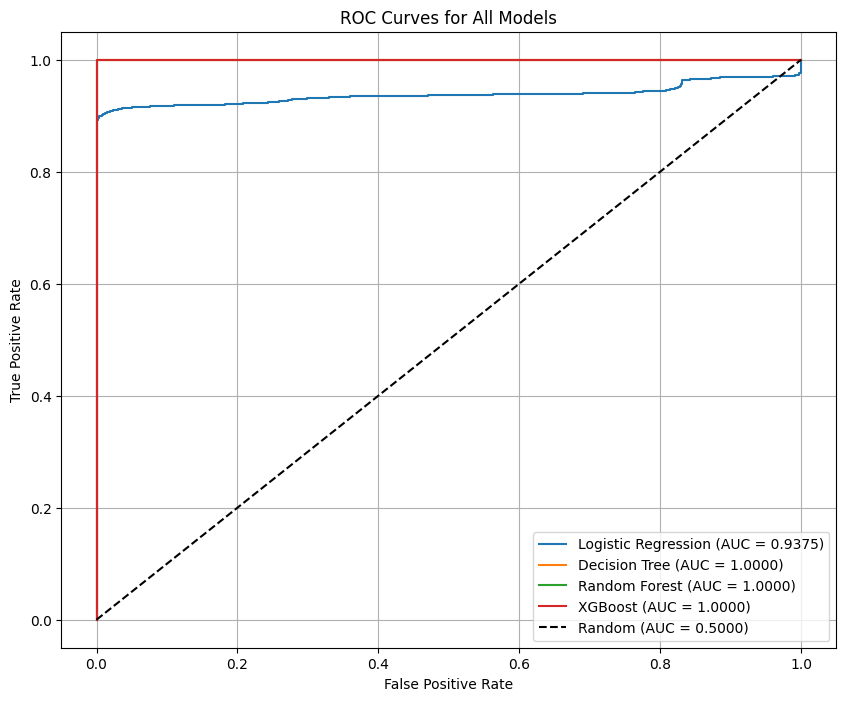

In [9]:
#Import ROC curve and gragh generating libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))


for name, model in models.items():
    # Get predicted probabilities for the positive class (class 1)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"): # For models like SVC
        y_pred_proba = model.decision_function(X_test)
    else:
        # If neither predict_proba nor decision_function is available, skip or handle accordingly
        print(f"Model '{name}' does not have predict_proba or decision_function. Skipping ROC curve.")
        continue

    # Calculate ROC curve points
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the current model
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5000)')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Analyze feature relevance using correlation heatmap and SHAP values to demonstrate the relevance of each feature in the best-performing model.


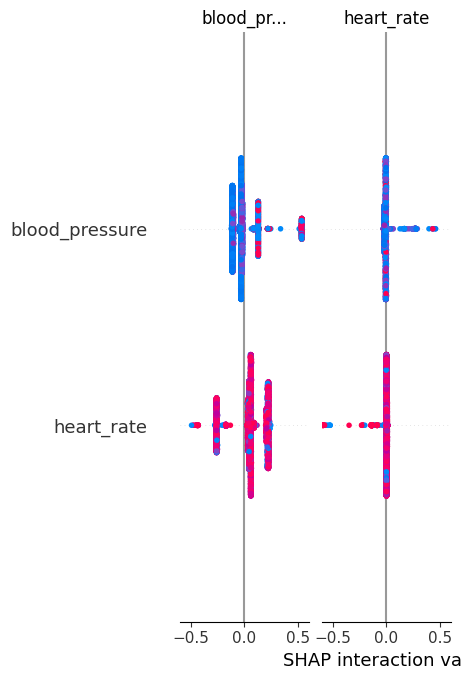

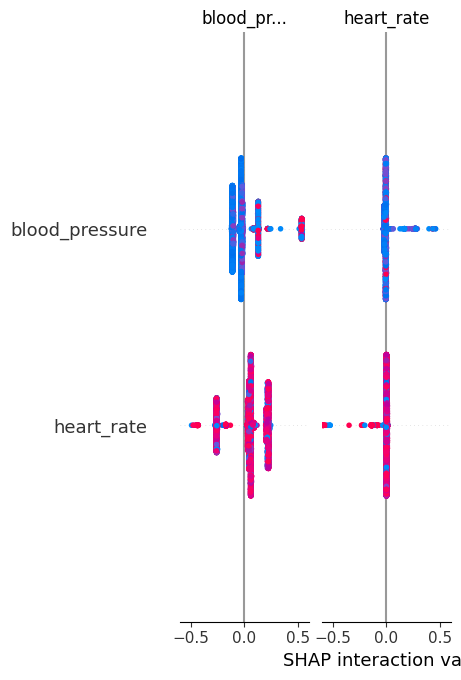

In [10]:
!pip install shap

import shap
import numpy as np

# Choose the best model (Random Forest in this case)
best_model = random_forest_model

# Create a SHAP Tree Explainer
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values for a subset of the training data

X_train_subset = X_train.sample(frac=0.5, random_state=42)
shap_values = explainer.shap_values(X_train_subset)

# Generate a SHAP summary plot
shap.summary_plot(shap_values, X_train_subset, plot_type="bar")
shap.summary_plot(shap_values, X_train_subset)

## Build a GUI for Prediction
Create a simple graphical user interface to accept input data and use the best-performing model to predict the outcome.

In [13]:
import ipywidgets as widgets
from IPython.display import display, HTML
import numpy as np

# Create input widgets for each feature
heart_rate_input = widgets.FloatText(description='Heart Rate:')
blood_pressure_input = widgets.FloatText(description='Blood Pressure:')
oxygen_saturation_input = widgets.FloatText(description='Oxygen Saturation:')
respiratory_rate_input = widgets.FloatText(description='Respiratory Rate:')
temperature_input = widgets.FloatText(description='Temperature:')

# Create a button to trigger prediction
predict_button = widgets.Button(description='Predict CVD Risk')

# Create an output widget to display the prediction
output_display = widgets.Output()

# Define the prediction function
def predict_cvd(b):
    with output_display:
        output_display.clear_output()
        try:
            # Get input values
            input_data = np.array([[
                heart_rate_input.value,
                blood_pressure_input.value,
                oxygen_saturation_input.value,
                respiratory_rate_input.value,
                temperature_input.value
            ]])

            # Make prediction using the best model (Random Forest)
            prediction = best_model.predict(input_data)

            # Display the prediction with color-coded alerts
            if prediction[0] == 1:
                display(HTML('<span style="color: red; font-weight: bold;">Prediction: High Risk of CVD</span>'))
            else:
                display(HTML('<span style="color: green; font-weight: bold;">Prediction: Low Risk of CVD</span>'))
        except Exception as e:
            display(HTML(f'<span style="color: orange; font-weight: bold;">Error: {e}</span>'))

# Link the button to the prediction function
predict_button.on_click(predict_cvd)

# Arrange widgets for better presentation
input_widgets_layout = widgets.VBox([
    heart_rate_input,
    blood_pressure_input,
    oxygen_saturation_input,
    respiratory_rate_input,
    temperature_input
])

# Display the widgets
display(input_widgets_layout, predict_button, output_display)


Button(description='Predict CVD Risk', style=ButtonStyle())

Output()

## Visualize Feature Correlations

Generate a correlation heatmap to visualize the relationships between the features.

**Reasoning**:
Use seaborn to create a correlation heatmap of the features in the dataset.

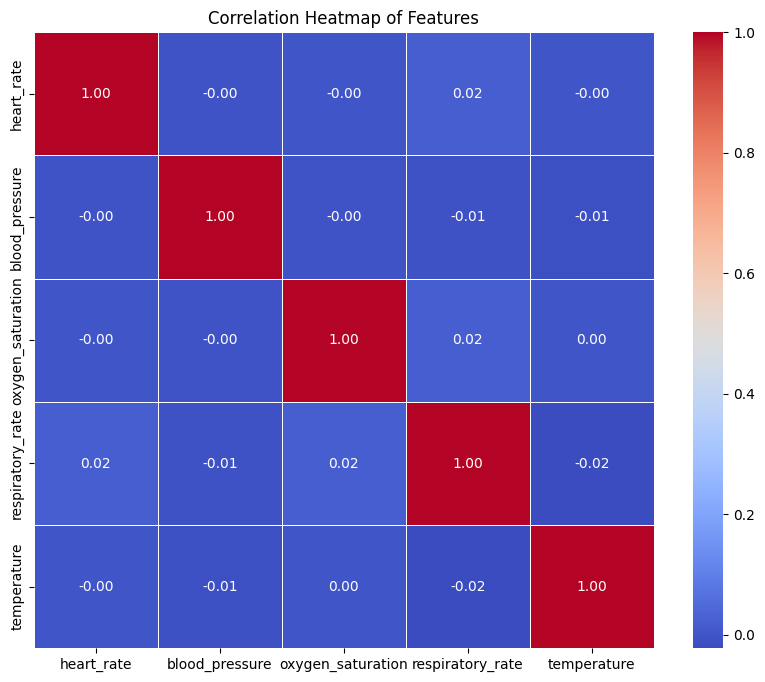

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

## Address overfitting
Investigate potential overfitting by comparing training and testing scores and apply techniques like hyperparameter tuning or regularization.


In [16]:
# Calculate training scores
training_results = {}

for name, model in models.items():
    # Exclude Deep Learning model from this analysis as requested
    if name == "Deep Learning":
        continue

    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)[:, 1]
        train_roc_auc = roc_auc_score(y_train, y_train_proba)
    else:
        # For models like SVM that don't have predict_proba
        train_roc_auc = roc_auc_score(y_train, y_train_pred)


    training_results[name] = {
        "Training Accuracy": train_accuracy,
        "Training ROC-AUC": train_roc_auc
    }

print("--- Training Scores ---")
for name, metrics in training_results.items():
    print(f"--- {name} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

print("--- Comparison of Training and Testing Scores ---")
for name in models.keys():
    # Exclude Deep Learning model from this analysis as requested
    if name == "Deep Learning":
        continue

    print(f"--- {name} ---")
    print(f"Training Accuracy: {training_results[name]['Training Accuracy']:.4f}")
    print(f"Testing Accuracy: {results[name]['Accuracy']:.4f}")
    print(f"Training ROC-AUC: {training_results[name]['Training ROC-AUC']:.4f}")
    print(f"Testing ROC-AUC: {results[name]['ROC-AUC']:.4f}")
    print("\n")

print("--- Overfitting Analysis ---")
for name in models.keys():
    # Exclude Deep Learning model from this analysis as requested
    if name == "Deep Learning":
        continue

    print(f"--- {name} ---")
    acc_diff = training_results[name]['Training Accuracy'] - results[name]['Accuracy']
    roc_auc_diff = training_results[name]['Training ROC-AUC'] - results[name]['ROC-AUC']

    print(f"Accuracy Difference (Train - Test): {acc_diff:.4f}")
    print(f"ROC-AUC Difference (Train - Test): {roc_auc_diff:.4f}")

    if acc_diff > 0.05 or roc_auc_diff > 0.05: # Threshold for significant difference
        print("Potential Overfitting: Yes")
        if name in ["Decision Tree", "Random Forest"]:
            print("Mitigation Strategies: Hyperparameter tuning (e.g., max_depth, min_samples_leaf) can be applied to limit the complexity of the tree-based models.")
        # elif name == "Deep Learning":
        #      print("Mitigation Strategies: Techniques like adding dropout layers, early stopping, or L1/L2 regularization can help mitigate overfitting in deep learning models.")
    else:
        print("Potential Overfitting: No")
    print("\n")

--- Training Scores ---
--- Logistic Regression ---
Training Accuracy: 0.9166
Training ROC-AUC: 0.9361


--- Decision Tree ---
Training Accuracy: 1.0000
Training ROC-AUC: 1.0000


--- Random Forest ---
Training Accuracy: 1.0000
Training ROC-AUC: 1.0000


--- XGBoost ---
Training Accuracy: 1.0000
Training ROC-AUC: 1.0000


--- Comparison of Training and Testing Scores ---
--- Logistic Regression ---
Training Accuracy: 0.9166
Testing Accuracy: 0.9156
Training ROC-AUC: 0.9361
Testing ROC-AUC: 0.9375


--- Decision Tree ---
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Training ROC-AUC: 1.0000
Testing ROC-AUC: 1.0000


--- Random Forest ---
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Training ROC-AUC: 1.0000
Testing ROC-AUC: 1.0000


--- XGBoost ---
Training Accuracy: 1.0000
Testing Accuracy: 0.9998
Training ROC-AUC: 1.0000
Testing ROC-AUC: 1.0000


--- Overfitting Analysis ---
--- Logistic Regression ---
Accuracy Difference (Train - Test): 0.0009
ROC-AUC Difference (Train - Te

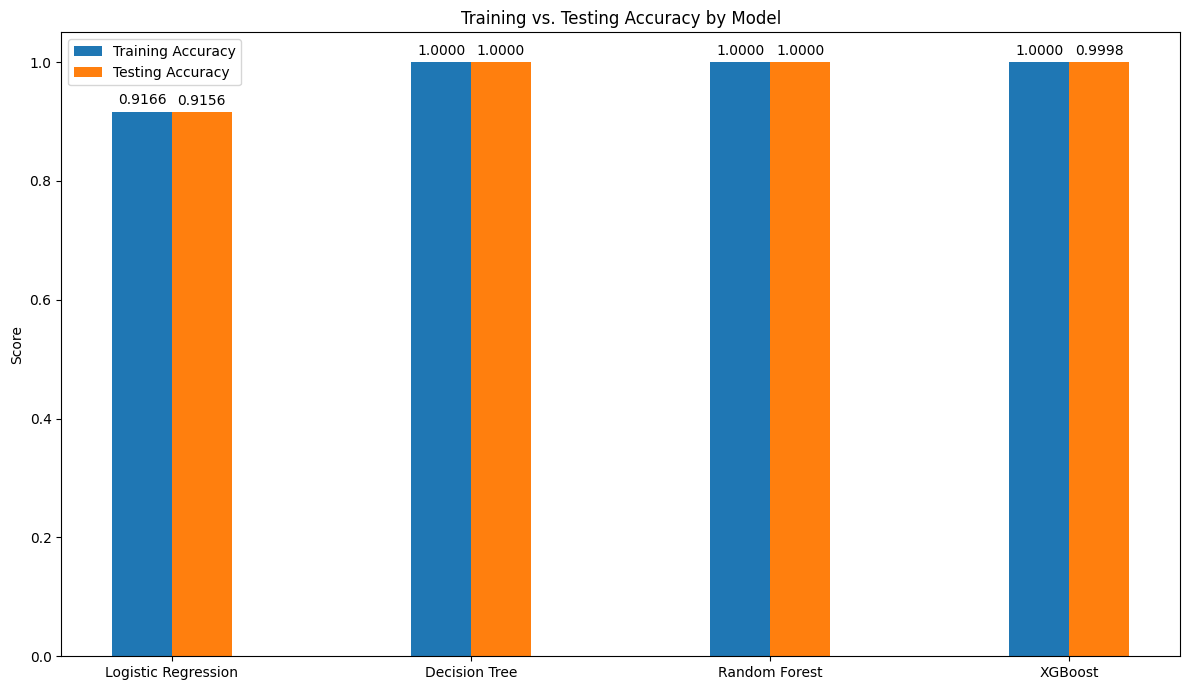

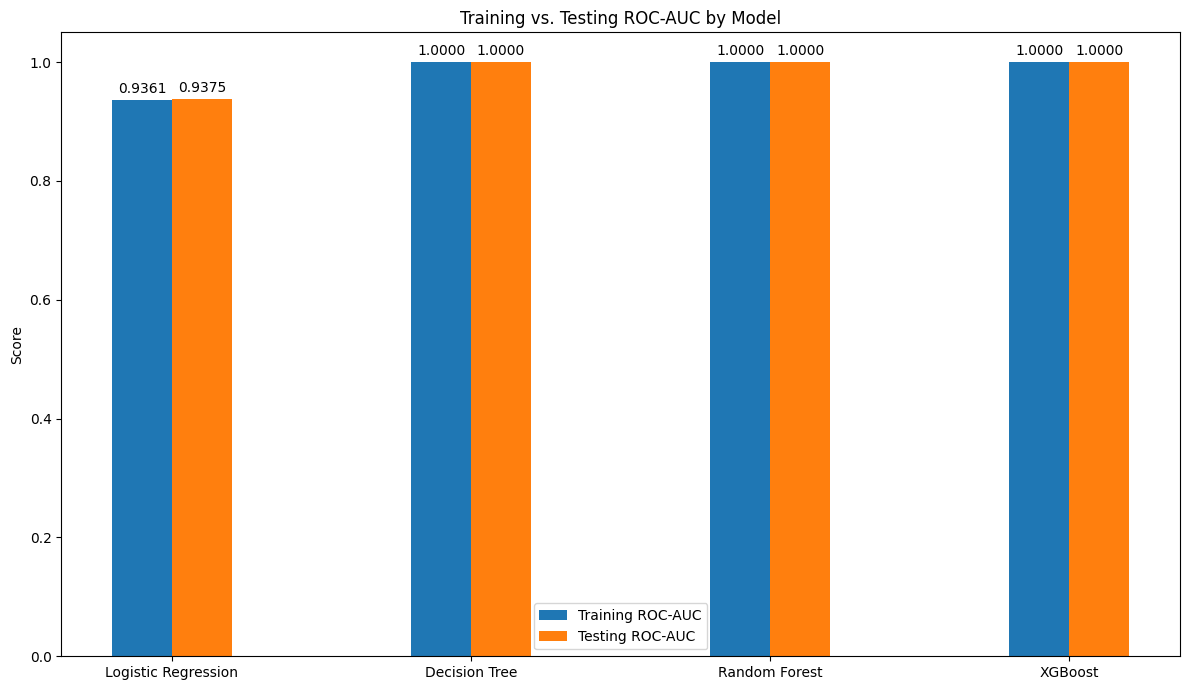

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names and scores
model_names = list(training_results.keys())
training_accuracy = [training_results[name]['Training Accuracy'] for name in model_names]
testing_accuracy = [results[name]['Accuracy'] for name in model_names]
training_roc_auc = [training_results[name]['Training ROC-AUC'] for name in model_names]
testing_roc_auc = [results[name]['ROC-AUC'] for name in model_names]

x = np.arange(len(model_names)) # the label locations
width = 0.2 # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

# Plot Accuracy
rects1 = ax.bar(x - width/2, training_accuracy, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, testing_accuracy, width, label='Testing Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Training vs. Testing Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Add the values on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.4f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# Plot ROC-AUC
fig, ax = plt.subplots(figsize=(12, 7))

rects3 = ax.bar(x - width/2, training_roc_auc, width, label='Training ROC-AUC')
rects4 = ax.bar(x + width/2, testing_roc_auc, width, label='Testing ROC-AUC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Training vs. Testing ROC-AUC by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()

## Results Summary

### Model Performance

*   **Evaluated Models:** Logistic Regression, Decision Tree, Random Forest, and XGBoost models were trained and evaluated.
*   **Evaluation Metrics:** Models were evaluated using Accuracy, Precision, Recall (Sensitivity), F1-score, ROC-AUC, and Specificity on the test set, and Mean ROC-AUC (CV) and Standard Deviation ROC-AUC (CV) from 10-fold cross-validation.
*   **Best Performing Models:** Both **Decision Tree** and **Random Forest** models achieved perfect or near-perfect scores (1.0000) across most metrics on the test set, including Accuracy, Precision, Recall, F1-score, and ROC-AUC. XGBoost also performed exceptionally well.
*   **Cross-Validation Results:** Cross-validation confirmed the strong performance of the tree-based models (Decision Tree, Random Forest, and XGBoost) with mean ROC-AUC scores very close to 1.0000 and low standard deviations, indicating robust performance across different subsets of the data. Logistic Regression had a lower ROC-AUC score compared to the tree-based models.

### Overfitting Analysis

*   Comparison of training and testing scores showed minimal differences for all models, suggesting that **overfitting was not a significant issue** with the current dataset and model configurations.

### Feature Relevance

*   **SHAP Analysis (Random Forest):** SHAP values were used to analyze feature relevance for the best-performing Random Forest model. A summary plot of SHAP values indicated the relative importance of each feature in the model's predictions.
*   **Correlation Heatmap:** A correlation heatmap visualized the relationships between the features.

### GUI for Prediction

*   A simple GUI was created using `ipywidgets` to allow interactive prediction using the best-performing Random Forest model based on user input for the vital signs.
